# Multivariate Time Series Forecasting using VAR

**1. Loading the data**

In [253]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [254]:
climate_df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

In [255]:
climate_df.shape

(1462, 5)

In [256]:
climate_df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


**2. Data Preprocessing**

In [257]:
climate_df.isna().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [258]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [259]:
# converting the 'date' column to 'datetime' datatype
climate_df['date'] = pd.to_datetime(climate_df['date'])

In [260]:
# making the 'date' column as index
climate_df.set_index('date', inplace = True)

In [261]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [262]:
climate_df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


**3. Plotting the Data**

In [263]:
climate_df.iloc[0]

,2013-01-01
meantemp,10.000000
humidity,84.500000
wind_speed,0.000000
meanpressure,1015.666667


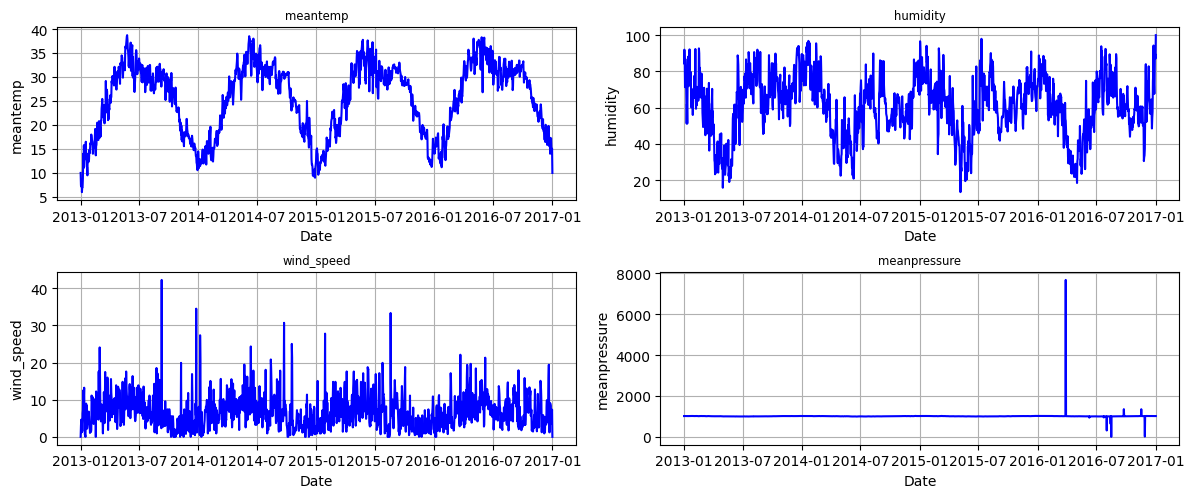

In [266]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
plt.rcParams['font.size'] = 7
columns = climate_df.columns

for i in range(0, 2):
    for j in range(0, 2):
        col_index = i * 2 + j
        col_name = columns[col_index]
        axes[i, j].plot(climate_df.index, climate_df[col_name], color = 'blue')
        axes[i, j].set_title(f'{col_name}')
        axes[i, j].set_xlabel('Date')
        axes[i, j].set_ylabel(f'{col_name}')
        axes[i, j].grid(True)

plt.tight_layout()

**4. Checking the stationarity**

In [267]:
# Augmented Dickey Fuller Test

def adf_test(data, df):
  for i in data:
    col = df[i].dropna()
    result = adfuller(col)
    print(i)
    print(f'ADF Statistic : {result[0]}')
    print(f'p-value : {result[1]}')
    if result[1] <= 0.05:
        print("Reject the Null Hypothesis - Data is Stationary")
    else:
        print("Accept the Null Hypothesis - Data is not stationary")
    print('----------')

adf_test(climate_df.columns, climate_df)

meantemp
ADF Statistic : -2.0210690559206737
p-value : 0.2774121372301601
Accept the Null Hypothesis - Data is not stationary
----------
humidity
ADF Statistic : -3.675576919163339
p-value : 0.004470100478130758
Reject the Null Hypothesis - Data is Stationary
----------
wind_speed
ADF Statistic : -3.838096756685109
p-value : 0.0025407221531463645
Reject the Null Hypothesis - Data is Stationary
----------
meanpressure
ADF Statistic : -38.07859002556161
p-value : 0.0
Reject the Null Hypothesis - Data is Stationary
----------


In [268]:
# Differencing - Making the data stationary
climate_df['First_Order_meantemp'] = climate_df['meantemp'].diff()

In [269]:
climate_df.dropna(inplace = True)

In [270]:
adf_test(climate_df.columns, climate_df)

meantemp
ADF Statistic : -2.0298463965856746
p-value : 0.2736417313195788
Accept the Null Hypothesis - Data is not stationary
----------
humidity
ADF Statistic : -3.6637185251986613
p-value : 0.004653414494876207
Reject the Null Hypothesis - Data is Stationary
----------
wind_speed
ADF Statistic : -3.8202786534737982
p-value : 0.002706520558975161
Reject the Null Hypothesis - Data is Stationary
----------
meanpressure
ADF Statistic : -38.06557237499529
p-value : 0.0
Reject the Null Hypothesis - Data is Stationary
----------
First_Order_meantemp
ADF Statistic : -16.378720267074673
p-value : 2.764863137594644e-29
Reject the Null Hypothesis - Data is Stationary
----------


In [271]:
climate_df.drop(columns = ['meantemp'], inplace = True)

<Axes: xlabel='date'>

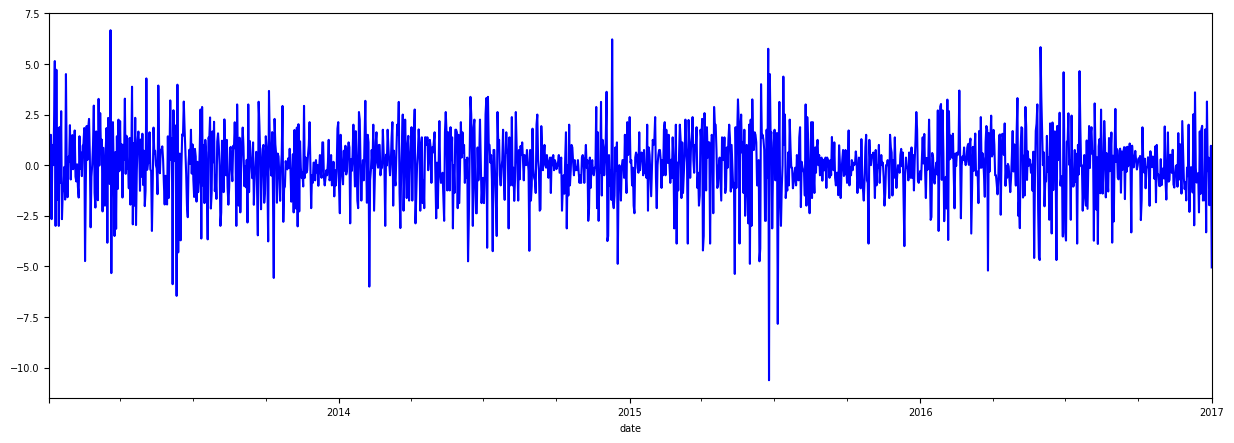

In [272]:
climate_df['First_Order_meantemp'].plot(figsize = (15, 5), color = 'blue')

**5. Granger Causality Test**

Guides whether to keep or remove variables based on their predictive significance.

In [273]:
climate_df.head()

,humidity,wind_speed,meanpressure,First_Order_meantemp
date,,,,
2013-01-02,92.000000,2.980000,1017.800000,-2.600000
2013-01-03,87.000000,4.633333,1018.666667,-0.233333
2013-01-04,71.333333,1.233333,1017.166667,1.500000
2013-01-05,86.833333,3.700000,1016.500000,-2.666667
2013-01-06,82.800000,1.480000,1018.000000,1.000000


- if p > 0.05 =
  X0 : X(t) does not causes y(t)
- if p < 0.05 = X1 : X(t) granger causes y(t)

In [274]:
for column in climate_df.columns:
    if column != 'First_Order_meantemp':
        # performing ranger casuality test
        test_result = grangercausalitytests(climate_df[['First_Order_meantemp', column]], maxlag=4, verbose=False)

        # Extract p-values
        p_values = [round(test_result[i+1][0]['ssr_chi2test'][1], 4) for i in range(4)]

        print(f"Column - {column} : P_Values - {p_values}")


Column - humidity : P_Values - [0.0001, 0.0016, 0.0221, 0.0498]
Column - wind_speed : P_Values - [0.0008, 0.0034, 0.0173, 0.0532]
Column - meanpressure : P_Values - [0.455, 0.1483, 0.2477, 0.3737]


For all 4 lags of columns 'humidity' and 'wind_speed' the p-value is lower than 0.05 (somwhere it is on the borderline of 0.05) thich means **REJECT THE NULL HYPOTHESIS WHICH SAYS X(T) DOES NOT CAUSE Y(T)** because here the X(t) i.e 'humidity' and 'wind_speed' do cause y(t) i.e 'First_Order_meantemp'

In [275]:
df = climate_df[['First_Order_meantemp', 'humidity', 'wind_speed']]

In [276]:
df.head()

,First_Order_meantemp,humidity,wind_speed
date,,,
2013-01-02,-2.600000,92.000000,2.980000
2013-01-03,-0.233333,87.000000,4.633333
2013-01-04,1.500000,71.333333,1.233333
2013-01-05,-2.666667,86.833333,3.700000
2013-01-06,1.000000,82.800000,1.480000


**6. Removing the seasonality**

**(i) Humidity**

<Axes: xlabel='date'>

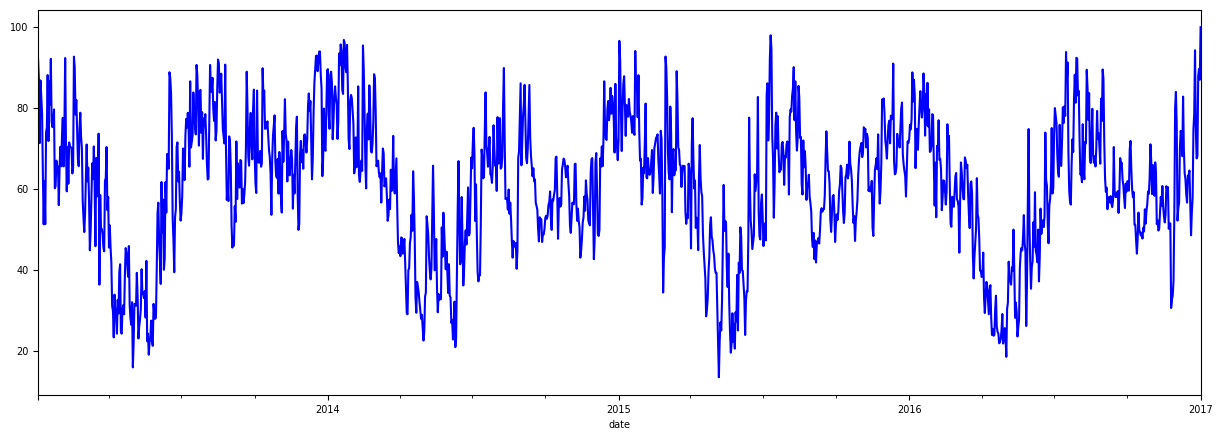

In [277]:
df['humidity'].plot(figsize = (15, 5), color = 'blue')

In [278]:
df.loc['2015']

,First_Order_meantemp,humidity,wind_speed
date,,,
2015-01-01,2.375,72.000,0.9250
2015-01-02,0.125,96.625,3.0125
2015-01-03,0.250,92.000,0.9250
2015-01-04,-1.000,78.750,9.5125
2015-01-05,-0.125,69.375,15.0500
...,...,...,...
2015-12-27,2.625,63.250,7.8875
2015-12-28,1.750,58.125,10.8875
2015-12-29,-0.750,65.000,7.4125


- If the data is daily and the pattern repeats yearly, s = 365.
- If the data is monthly and the pattern repeats yearly, s = 12.
- If the data is weekly and the pattern repeats yearly, s = 52.

Here, Data is monthly and the pattern repeats yearly, s = 12.

In [279]:
#seasonal difference
df['seasonal_diff_humidity'] = df['humidity'].diff(12)

In [280]:
#dropping null values
df.dropna(inplace = True)

In [281]:
#dropping the original col
df.drop(columns = ['humidity'], inplace = True)

In [282]:
df.head()

,First_Order_meantemp,wind_speed,seasonal_diff_humidity
date,,,
2013-01-14,-3.000000,0.616667,-3.833333
2013-01-15,1.880952,0.528571,-15.142857
2013-01-16,-0.880952,0.000000,15.333333
2013-01-17,2.666667,5.250000,-6.000000
2013-01-18,-2.666667,8.950000,9.366667


In [283]:
adf_test(df.columns, df)

First_Order_meantemp
ADF Statistic : -16.19099888486139
p-value : 4.170777842540189e-29
Reject the Null Hypothesis - Data is Stationary
----------
wind_speed
ADF Statistic : -3.7936996678514006
p-value : 0.0029724374175193633
Reject the Null Hypothesis - Data is Stationary
----------
seasonal_diff_humidity
ADF Statistic : -6.52240883469528
p-value : 1.0343068901162499e-08
Reject the Null Hypothesis - Data is Stationary
----------


<Axes: xlabel='date'>

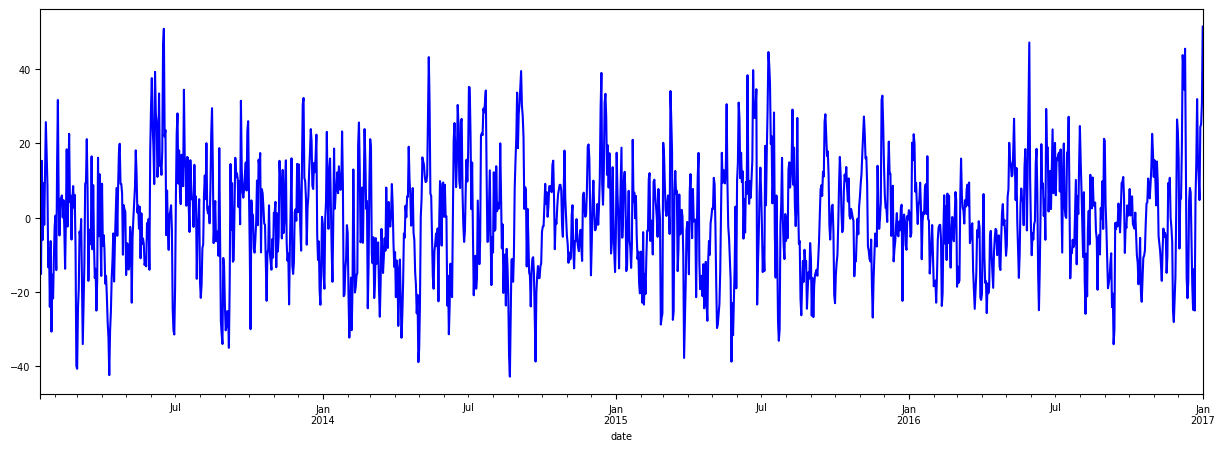

In [284]:
df['seasonal_diff_humidity'].plot(figsize = (15, 5), color = 'blue')

In [285]:
df.head()

,First_Order_meantemp,wind_speed,seasonal_diff_humidity
date,,,
2013-01-14,-3.000000,0.616667,-3.833333
2013-01-15,1.880952,0.528571,-15.142857
2013-01-16,-0.880952,0.000000,15.333333
2013-01-17,2.666667,5.250000,-6.000000
2013-01-18,-2.666667,8.950000,9.366667


**(ii) Humidity**

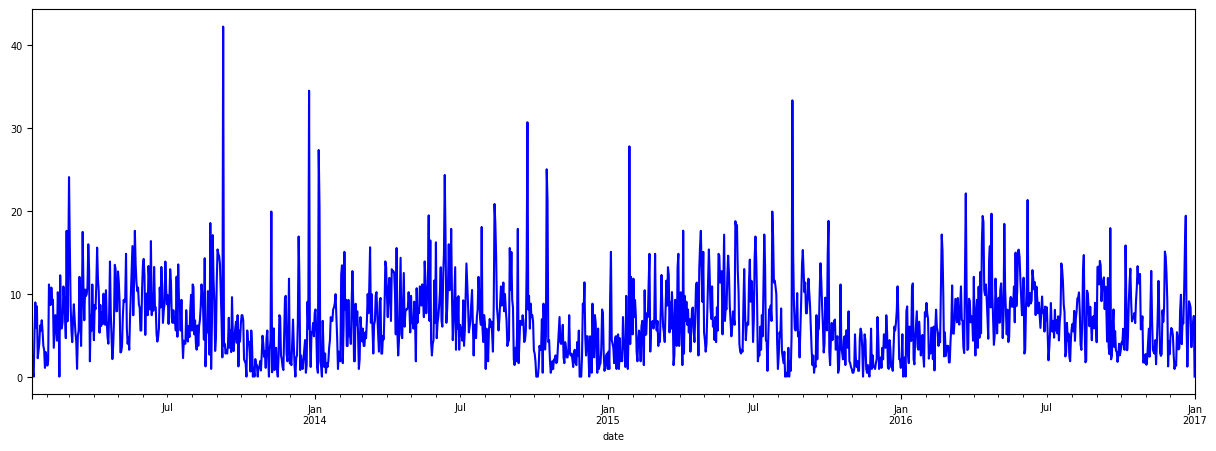

In [287]:
df['wind_speed'].plot(figsize = (15, 5), color = 'blue');

In [288]:
#seasonal difference
df['seasonal_diff_wind_speed'] = df['wind_speed'].diff(12)

In [289]:
#dropping null values
df.dropna(inplace = True)

In [290]:
#dropping the original col
df.drop(columns = ['wind_speed'], inplace = True)

In [291]:
df.head()

,First_Order_meantemp,seasonal_diff_humidity,seasonal_diff_wind_speed
date,,,
2013-01-26,0.416667,-24.000000,6.183333
2013-01-27,0.190476,-6.285714,5.028571
2013-01-28,1.976190,-30.666667,3.700000
2013-01-29,-0.708333,-15.333333,-2.012500
2013-01-30,0.589286,-21.738095,-7.892857


In [292]:
adf_test(df.columns, df)

First_Order_meantemp
ADF Statistic : -16.171904759237798
p-value : 4.355939264342912e-29
Reject the Null Hypothesis - Data is Stationary
----------
seasonal_diff_humidity
ADF Statistic : -6.462548944952354
p-value : 1.4313052835087181e-08
Reject the Null Hypothesis - Data is Stationary
----------
seasonal_diff_wind_speed
ADF Statistic : -11.052896856573218
p-value : 5.0279442954137013e-20
Reject the Null Hypothesis - Data is Stationary
----------


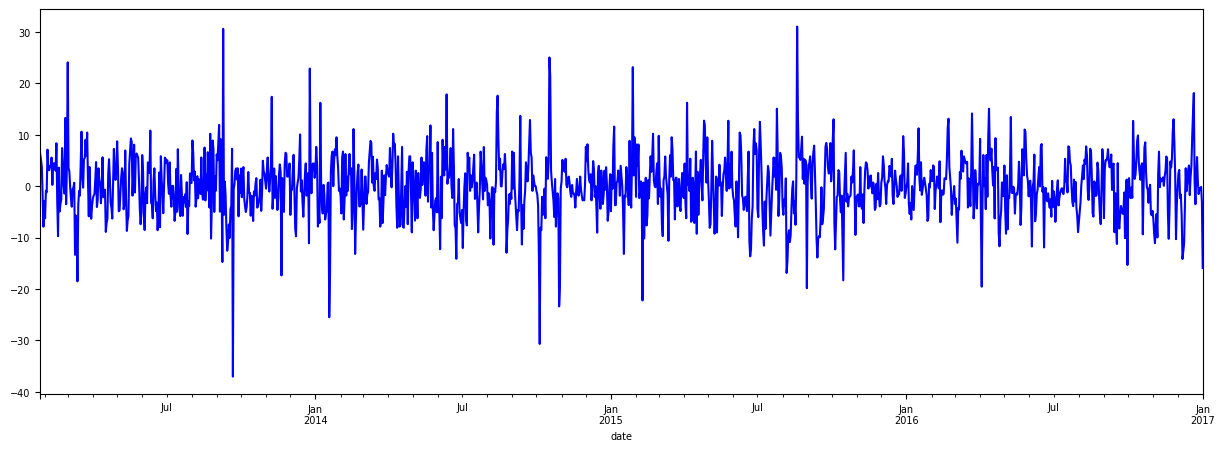

In [293]:
df['seasonal_diff_wind_speed'].plot(figsize = (15, 5), color = 'blue');

**7. Train - Test Split**

In [294]:
0.8 * len(df)

1149.6000000000001

In [295]:
train_df = df[:1159]
test_df = df[1159:]

train_df.shape, test_df.shape

((1159, 3), (278, 3))

**8. Finding the optimal lag value**

In [185]:
# model = VAR(train_df, freq = 'D')

# lag = []
# aic = []
# bic = []

# for i in range(50):
#   results = model.fit(i)
#   lag.append(i)
#   aic.append(results.aic)
#   bic.append(results.aic)

# lag_df = pd.DataFrame({
#     'Lag': lag,
#     'AIC': aic,
#     'BIC': bic
# })

In [ ]:
# lag_df

In [337]:
model = VAR(train_df)
model.select_order(70).summary()

,AIC,BIC,FPE,HQIC
0,9.821,9.835,1.842e+04,9.826
1,8.848,8.903,6961.,8.869
2,8.841,8.937,6913.,8.878
3,8.818,8.956,6758.,8.871
4,8.812,8.990,6711.,8.879
5,8.816,9.036,6738.,8.899
6,8.808,9.069,6685.,8.907
7,8.803,9.106,6656.,8.918
8,8.809,9.153,6694.,8.939
9,8.793,9.178,6586.,8.938


From AIC and BIC, AIC lag = 61

**9. Building the VAR model**

In [347]:
model = VAR(train_df,
            freq = 'D')

var_61 = model.fit(61)
var_13 = model.fit(13)

In [189]:
print(var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 17, Aug, 2024
Time:                     09:41:35
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    8.36535
Nobs:                     1146.00    HQIC:                   8.03658
Log likelihood:          -9249.01    FPE:                    2533.25
AIC:                      7.83717    Det(Omega_mle):         2285.48
--------------------------------------------------------------------
Results for equation First_Order_meantemp
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.172666         0.143054           -1.207           0.227
L1.First_Order_meantemp           -0.196257         0.035470           -5.533          

- Every lag is applied on every available column
- Here, lag = 13:<br>
  Lag 1 = ['First_Order_meantemp', 'wind_speed', 'seasonal_diff_humidity']<br>
  Lag 2 = ['First_Order_meantemp', 'wind_speed', 'seasonal_diff_humidity']
  .<br>
  .<br>
  .<br>
  Lag 61 = ['First_Order_meantemp', 'wind_speed', 'seasonal_diff_humidity']

**10. Forecasting the data**

In [348]:
lag_61 = var_61.k_ar
lag_13 = var_13.k_ar

In [349]:
lag_61, lag_13

(61, 13)

lag = Past lag of training set that I need to go so that I can get the initial value of testing set

i.e, If I take the last 61 values of my training dataframe then I'll get the first value of test dataframe

In [350]:
forecast_61 = pd.DataFrame(var_61.forecast(train_df.values[-lag_61:], steps = 15), columns = train_df.columns, index = test_df[:15].index)
forecast_13 = pd.DataFrame(var_13.forecast(train_df.values[-lag_13:], steps = 15), columns = train_df.columns, index = test_df[:15].index)
#i.e The data will be predicted for further 15 days

In [352]:
forecast_61.head(3)

,First_Order_meantemp,seasonal_diff_humidity,seasonal_diff_wind_speed
date,,,
2016-03-30,-1.459720,-1.693820,-1.096756
2016-03-31,0.743607,-0.084171,1.617052
2016-04-01,1.084812,-2.064656,1.935078


In [353]:
forecast_13.head(3)

,First_Order_meantemp,seasonal_diff_humidity,seasonal_diff_wind_speed
date,,,
2016-03-30,-0.463325,-2.275989,-0.840290
2016-03-31,0.272251,-2.682358,0.287472
2016-04-01,-0.025359,-3.493805,2.845243


In [355]:
#comparing with test dataset
test_df.head(3)

,First_Order_meantemp,seasonal_diff_humidity,seasonal_diff_wind_speed
date,,,
2016-03-30,2.446429,-21.464286,0.308929
2016-03-31,0.428571,-22.123810,0.754762
2016-04-01,0.571429,-20.519048,9.189048


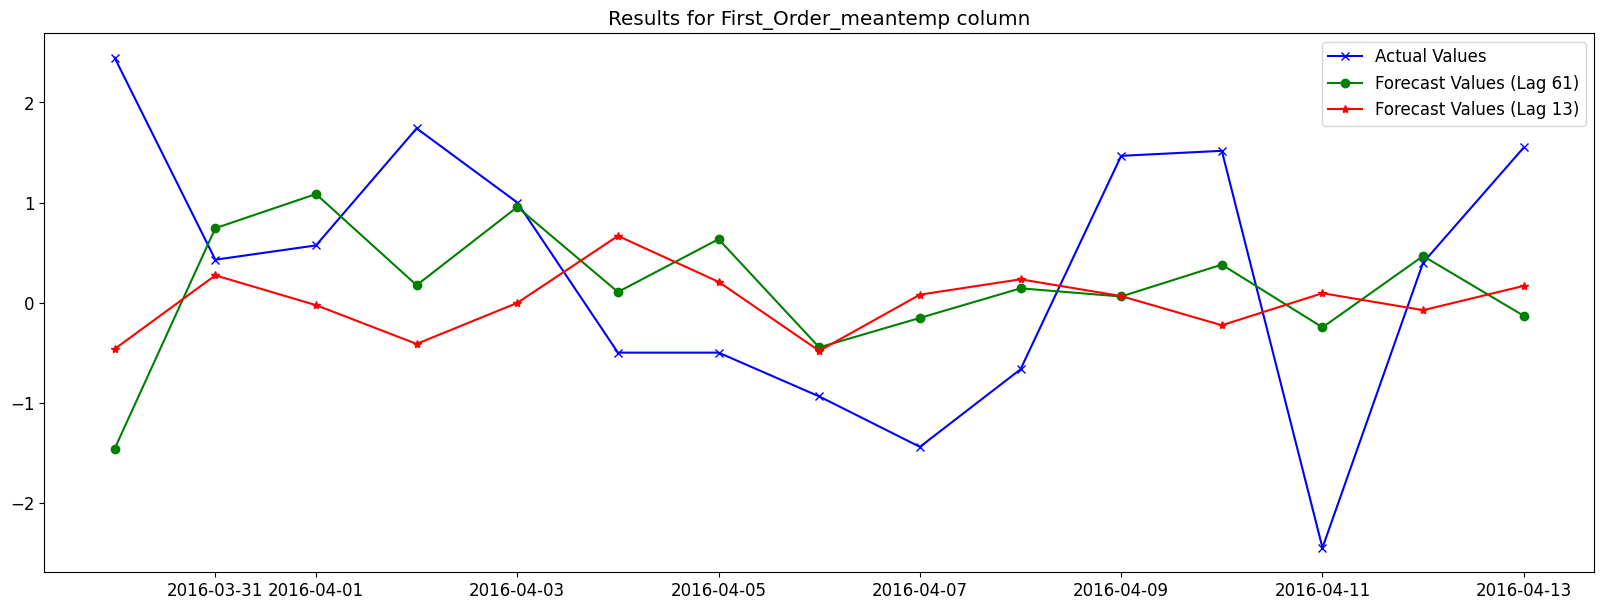

In [366]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.rcParams['font.size'] = 12
plt.plot(test_df['First_Order_meantemp'][:15], marker = 'x', color = 'blue', label = 'Actual Values');
plt.plot(forecast_61['First_Order_meantemp'], marker = 'o', color = 'green', label = 'Forecast Values (Lag 61)');
plt.plot(forecast_13['First_Order_meantemp'], marker = '*', color = 'red', label = 'Forecast Values (Lag 13)');
plt.title('Results for First_Order_meantemp column');
plt.legend();

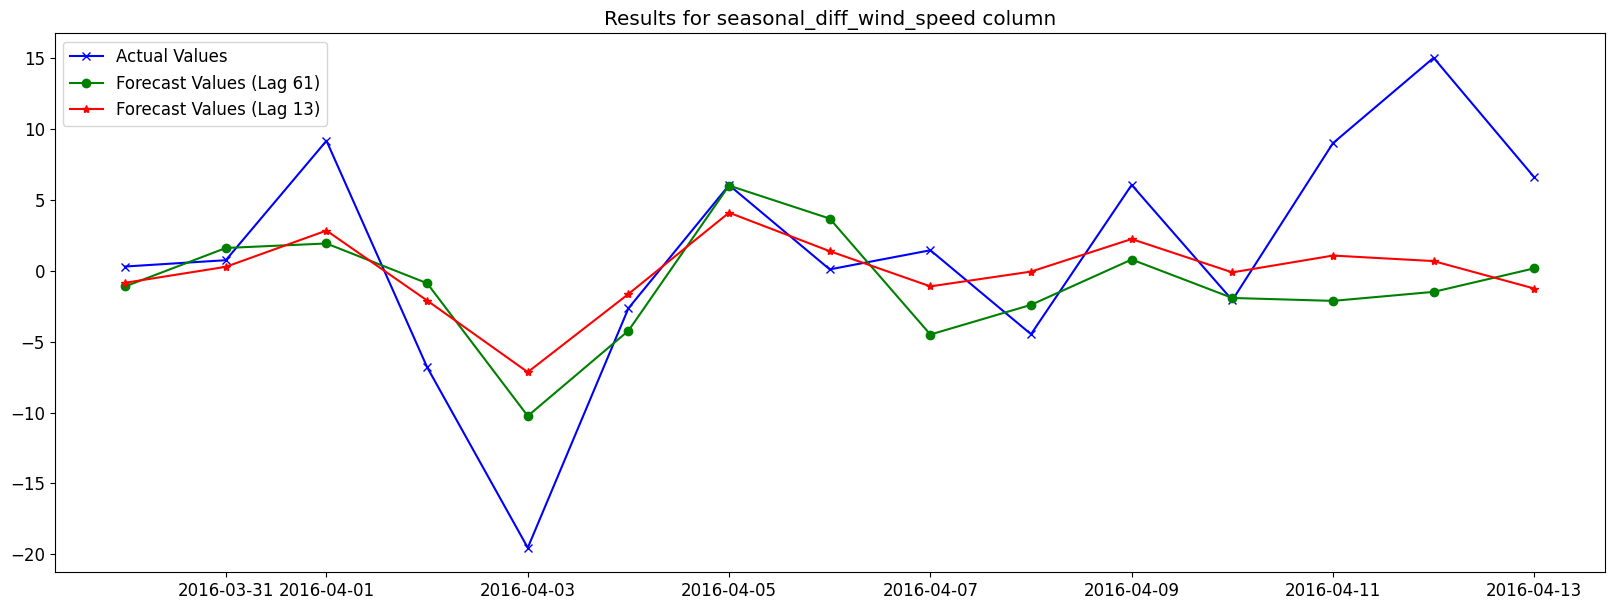

In [365]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.rcParams['font.size'] = 12
plt.plot(test_df['seasonal_diff_wind_speed'][:15], marker = 'x', color = 'blue', label = 'Actual Values');
plt.plot(forecast_61['seasonal_diff_wind_speed'], marker = 'o', color = 'green', label = 'Forecast Values (Lag 61)');
plt.plot(forecast_13['seasonal_diff_wind_speed'], marker = '*', color = 'red', label = 'Forecast Values (Lag 13)');
plt.title('Results for seasonal_diff_wind_speed column');
plt.legend();

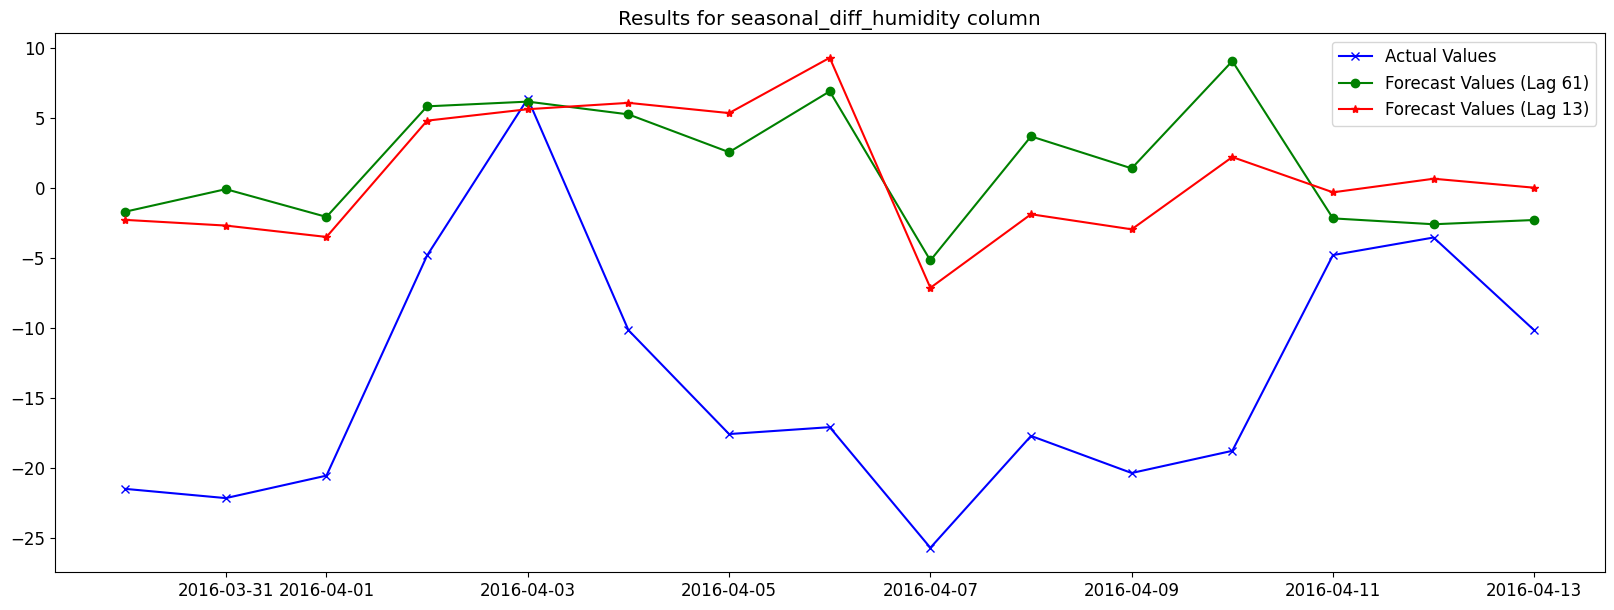

In [364]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.rcParams['font.size'] = 12
plt.plot(test_df['seasonal_diff_humidity'][:15], marker = 'x', color = 'blue', label = 'Actual Values');
plt.plot(forecast_61['seasonal_diff_humidity'], marker = 'o', color = 'green', label = 'Forecast Values (Lag 61)');
plt.plot(forecast_13['seasonal_diff_humidity'], marker = '*', color = 'red', label = 'Forecast Values (Lag 13)');
plt.title('Results for seasonal_diff_humidity column');
plt.legend();